In [18]:
#import statements
import pandas as pd
import numpy as np
import ast
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

CoolTone = pd.read_csv('/Users/pallavi/Downloads/cooltonee.csv')
WarmTone = pd.read_csv('/Users/pallavi/Downloads/warmtone.csv')

CoolTone["Label"] = 0
WarmTone["Label"] = 1

combined_data = pd.concat([CoolTone, WarmTone], ignore_index=True)

def extract_floats_from_string(val):
    if isinstance(val, str):
        pattern = r"np\.float64\(([-+]?\d*\.\d+|\d+)\)"
        matches = re.findall(pattern, val)
        if len(matches) == 3:
            return [float(match) for match in matches]
    return np.nan

combined_data["YUV_values"] = combined_data["YUV_values"].apply(extract_floats_from_string)

combined_data = combined_data.dropna(subset=["YUV_values"])

print(f"Valid rows after processing: {combined_data['YUV_values'].notna().sum()}")

X = np.array(combined_data["YUV_values"].tolist())
y = combined_data["Label"]

print(f"Feature matrix shape: {X.shape}")
print(f"Label shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Valid rows after processing: 148
Feature matrix shape: (148, 3)
Label shape: (148,)
Accuracy: 0.5333333333333333
AUC: 0.5335968379446641

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.65      0.59        23
           1       0.53      0.41      0.46        22

    accuracy                           0.53        45
   macro avg       0.53      0.53      0.52        45
weighted avg       0.53      0.53      0.53        45



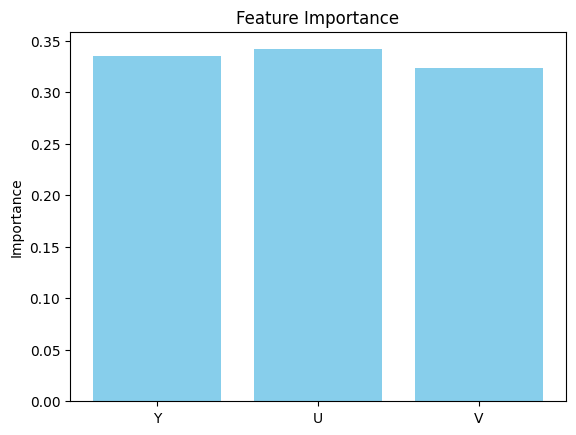

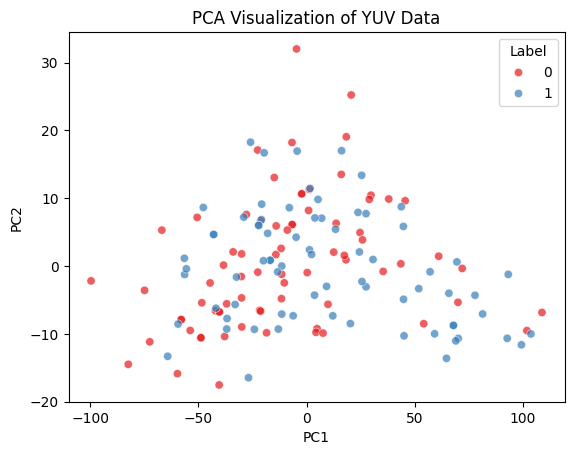

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

importances = clf.feature_importances_
plt.bar(['Y', 'U', 'V'], importances, color='skyblue')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plot_data = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
plot_data["Label"] = y

sns.scatterplot(data=plot_data, x="PC1", y="PC2", hue="Label", palette="Set1", alpha=0.7)
plt.title("PCA Visualization of YUV Data")
plt.show()



In [ ]:
#high accuracy = 2 groups r distinct. 2 separate pca clusters = distinct groups
#accuracy under 70 = overlapping groups. AUC under 0.69 = overlapping